# Convolutional Neural Networks

## Importing Modules

In [30]:
import numpy as np
print(np.__version__)

1.19.5


In [31]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.7.0-dev20210806


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
%matplotlib inline

## Checking GPU

In [34]:
physical_devices= tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs available: ', len(physical_devices))
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Invalid Device !!!')

Num GPUs available:  0
Invalid Device !!!


## Data Preparation

In [35]:
# Changes the directory
os.chdir('F:\\AIML\\practice\\datasets\\kaggle dog vs cats\\train')

In [36]:
pwd

'F:\\AIML\\practice\\datasets\\kaggle dog vs cats\\train'

In [37]:
# Organize data into train, valid, and test sets

if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')


    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')


    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

In [38]:
os.chdir('../../')

In [39]:
pwd

'F:\\AIML\\practice\\datasets'

In [40]:
train_path = 'F:\\AIML\\practice\\datasets\\kaggle dog vs cats\\train\\train'
valid_path = 'F:\\AIML\\practice\\datasets\\kaggle dog vs cats\\train\\valid'
test_path = 'F:\\AIML\\practice\\datasets\\kaggle dog vs cats\\train\\test'

In [41]:
# Train Batch
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Validation Batch
valid_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Test Batch
test_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [42]:
assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [43]:
imgs, labels = next(train_batches)

In [44]:
def plotImages(images_arr):
    ''' plot images in form of grid (1, 10) '''
    
    fig, axes= plt.subplots(1, 10, figsize=(20,30))
    axes= axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

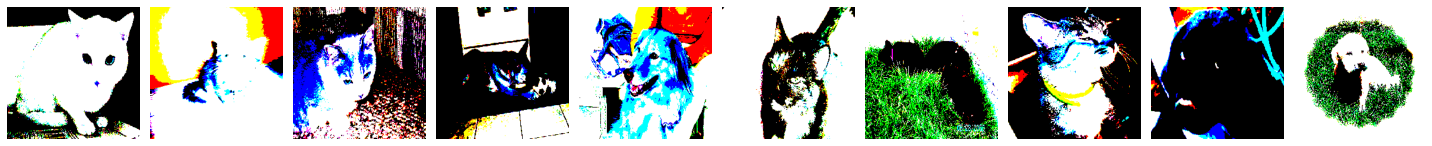

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [45]:
plotImages(imgs)
print(labels)

# Build And Train a CNN

In [46]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape= (224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)      0         
2D)                                                              
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)        0         
2D)                                                              
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

In [48]:
model.compile(optimizer=Adam(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'] )

In [49]:
model.fit(x= train_batches, validation_data= valid_batches, epochs= 10, verbose= 2)

Epoch 1/10
100/100 - 122s - loss: 26.5785 - accuracy: 0.5340 - val_loss: 3.7308 - val_accuracy: 0.6100 - 122s/epoch - 1s/step
Epoch 2/10
100/100 - 115s - loss: 1.4778 - accuracy: 0.7590 - val_loss: 2.7682 - val_accuracy: 0.6350 - 115s/epoch - 1s/step
Epoch 3/10
100/100 - 116s - loss: 1.0084 - accuracy: 0.8320 - val_loss: 2.6450 - val_accuracy: 0.6700 - 116s/epoch - 1s/step
Epoch 4/10
100/100 - 110s - loss: 0.2088 - accuracy: 0.9480 - val_loss: 2.4759 - val_accuracy: 0.6900 - 110s/epoch - 1s/step
Epoch 5/10
100/100 - 115s - loss: 0.1006 - accuracy: 0.9660 - val_loss: 2.7823 - val_accuracy: 0.6500 - 115s/epoch - 1s/step
Epoch 6/10
100/100 - 114s - loss: 0.0349 - accuracy: 0.9900 - val_loss: 2.5227 - val_accuracy: 0.6500 - 114s/epoch - 1s/step
Epoch 7/10


# Predict 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

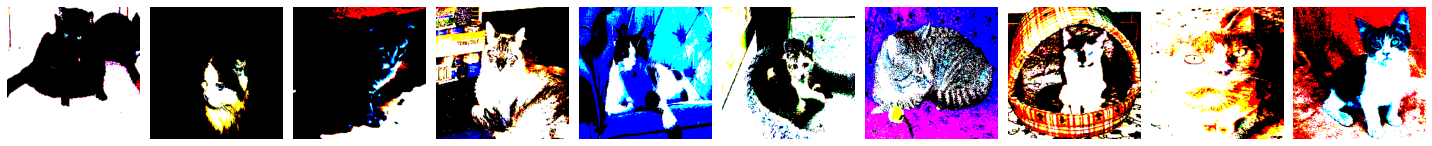

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels= next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
predictions= model.predict(x= test_batches, verbose=0)

In [ ]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[35 15]
 [18 32]]


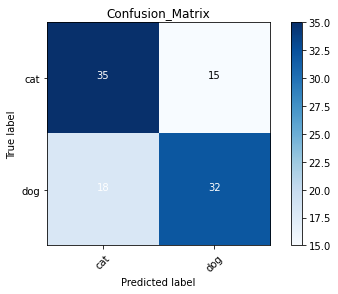

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= 'Confusion_Matrix')


# Build Fine-Tuned VGG16 model

In [ ]:
# download model 
vgg16_model = tf.keras.applications.vgg16.VGG16()

# 

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.engine.functional.Functional

In [ ]:
model= Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
type(model)

keras.engine.sequential.Sequential

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
# freeze the training of all layers
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train Fine-Tuned VGG16 Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x= test_batches, validation_data= valid_batches, epochs= 5, verbose= 2)

Epoch 1/5
10/10 - 303s - loss: 1.7847 - accuracy: 0.2900 - val_loss: 1.2517 - val_accuracy: 0.4100 - 303s/epoch - 30s/step
Epoch 2/5
10/10 - 307s - loss: 1.1491 - accuracy: 0.5200 - val_loss: 0.8574 - val_accuracy: 0.5700 - 307s/epoch - 31s/step
Epoch 3/5
10/10 - 309s - loss: 0.7273 - accuracy: 0.6400 - val_loss: 0.6070 - val_accuracy: 0.7250 - 309s/epoch - 31s/step
Epoch 4/5
10/10 - 332s - loss: 0.4861 - accuracy: 0.7600 - val_loss: 0.4655 - val_accuracy: 0.7800 - 332s/epoch - 33s/step
Epoch 5/5
10/10 - 314s - loss: 0.3520 - accuracy: 0.8600 - val_loss: 0.3664 - val_accuracy: 0.8300 - 314s/epoch - 31s/step


# Predict using Fine-Tuned VGG16 model

In [ ]:
predictions= model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,
                      y_pred=np.argmax(predictions, axis=-1))


In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[46  4]
 [ 7 43]]


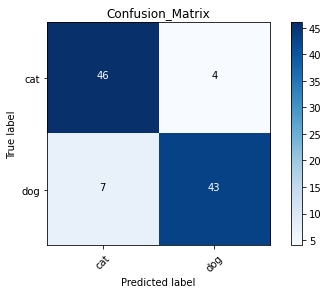

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion_Matrix')